In [1]:
"""
Movie Recommendation System
Author: Gift  Ahmed 
Date: 4 Dec., 2024

This script demonstrates a basic content-based movie recommendation system using TF-IDF and cosine similarity.
"""

'\nMovie Recommendation System\nAuthor: Gift  Ahmed \nDate: 4 Dec., 2024\n\nThis script demonstrates a basic content-based movie recommendation system using TF-IDF and cosine similarity.\n'

# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# 1. Load and Inspect Data

In [3]:
print("Loading data...")
df_movies = pd.read_csv('tmdb_5000_movies.csv.zip')
df_credits = pd.read_csv('tmdb_5000_credits.csv.zip')

Loading data...


# Display the first few rows of the dataset

In [4]:
print("\nMovies Data Overview:")
print(df_movies.head())


Movies Data Overview:
      budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en 

In [5]:
print("\nCredits Data Overview:")
print(df_credits.head())


Credits Data Overview:
   movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   
4     49529                               John Carter   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4  [{"cast_id": 5, "character": "John Carter", "c...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  
3  [{"credit_id": "52fe4781c3a36847f81398c3", "de...  
4  [{"credit_id": "52

# Check for missing data

In [6]:
print("\nMissing Values in Movies Dataset:")
print(df_movies.isnull().sum())


Missing Values in Movies Dataset:
budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64


# 2. Exploratory Data Analysis (EDA)

In [7]:
print("\nPerforming EDA...")


Performing EDA...


# Distribution of movie popularity

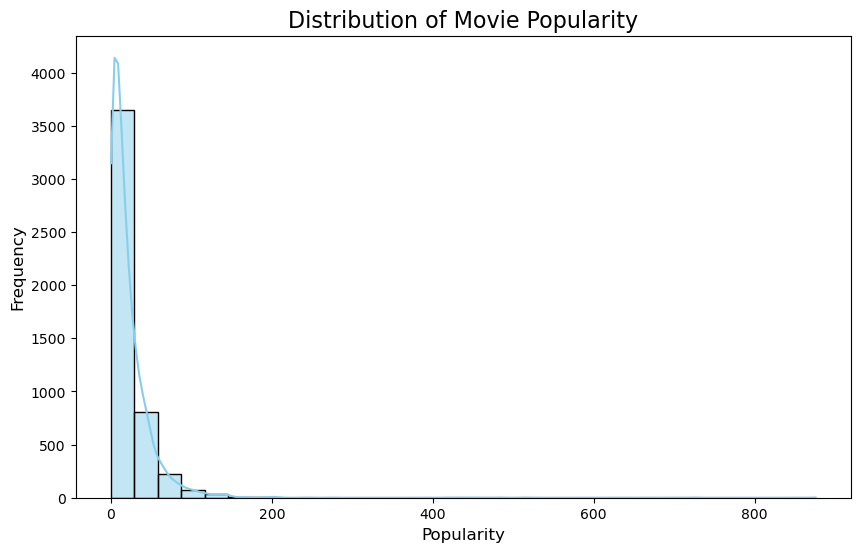

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df_movies['popularity'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Movie Popularity', fontsize=16)
plt.xlabel('Popularity', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Top 10 genres by frequency

In [9]:
print("\nAnalyzing genres...")
df_movies['genres'] = df_movies['genres'].apply(eval).apply(lambda x: [d['name'] for d in x] if isinstance(x, list) else [])
df_movies['primary_genre'] = df_movies['genres'].apply(lambda x: x[0] if x else None)
top_genres = df_movies['primary_genre'].value_counts().head(10)


Analyzing genres...


C:\Users\Gifted\AppData\Local\Temp\ipykernel_11224\2046277455.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis")


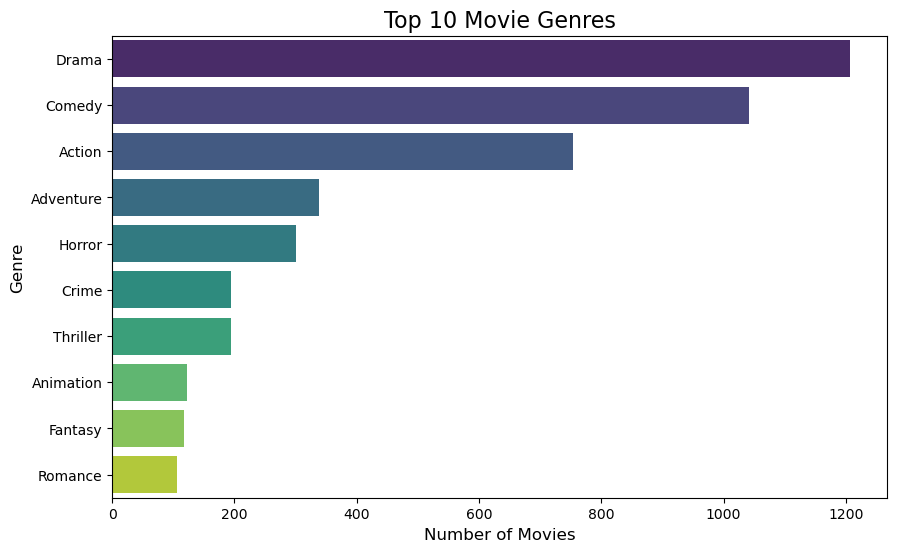

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis")
plt.title('Top 10 Movie Genres', fontsize=16)
plt.xlabel('Number of Movies', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.show()

# Basic Statistics and Insights

In [11]:
# Numerical Summary
print(df_movies[['budget', 'revenue', 'popularity', 'vote_average']].describe())

             budget       revenue   popularity  vote_average
count  4.803000e+03  4.803000e+03  4803.000000   4803.000000
mean   2.904504e+07  8.226064e+07    21.492301      6.092172
std    4.072239e+07  1.628571e+08    31.816650      1.194612
min    0.000000e+00  0.000000e+00     0.000000      0.000000
25%    7.900000e+05  0.000000e+00     4.668070      5.600000
50%    1.500000e+07  1.917000e+07    12.921594      6.200000
75%    4.000000e+07  9.291719e+07    28.313505      6.800000
max    3.800000e+08  2.787965e+09   875.581305     10.000000


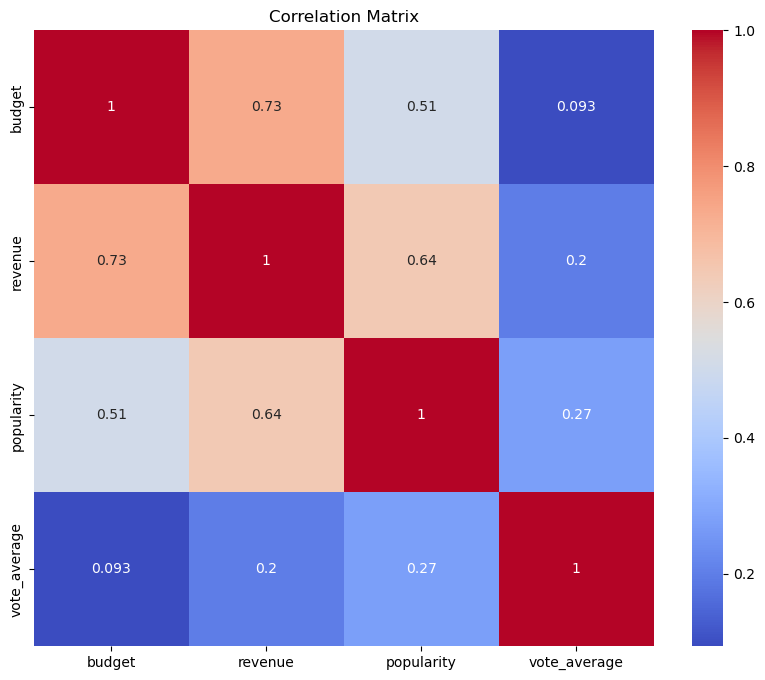

In [12]:
# Correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df_movies[['budget', 'revenue', 'popularity', 'vote_average']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Genre-Based Analysis


C:\Users\Gifted\AppData\Local\Temp\ipykernel_11224\3368761828.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_revenue.index, y=genre_revenue.values, palette='magma')


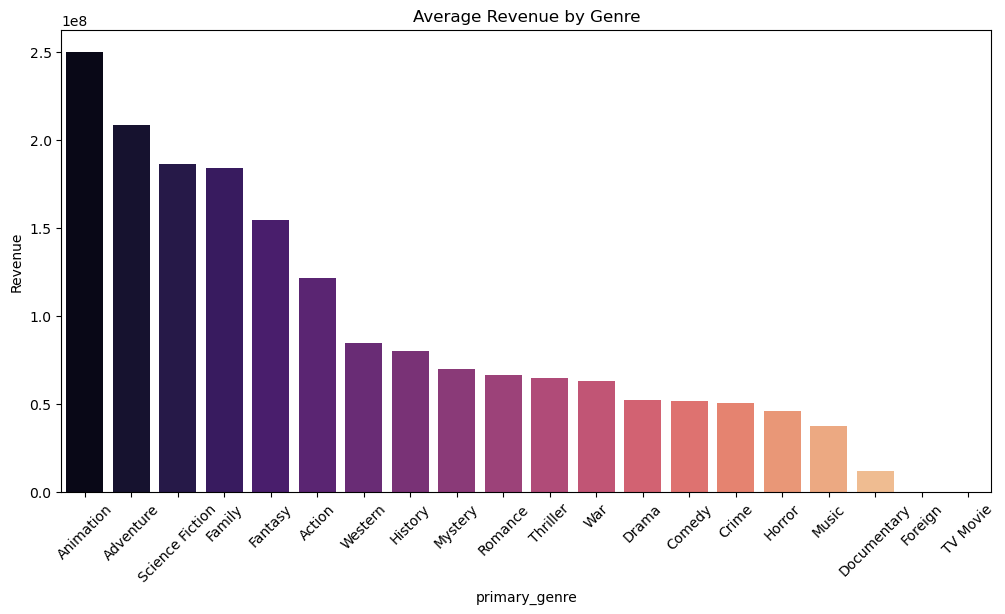

In [13]:
#Top Genres with High Revenue
genre_revenue = df_movies.explode('genres').groupby('primary_genre')['revenue'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_revenue.index, y=genre_revenue.values, palette='magma')
plt.title('Average Revenue by Genre')
plt.xticks(rotation=45)
plt.ylabel('Revenue')
plt.show()

C:\Users\Gifted\AppData\Local\Temp\ipykernel_11224\2428716100.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_votes.index, y=genre_votes.values, palette='viridis')


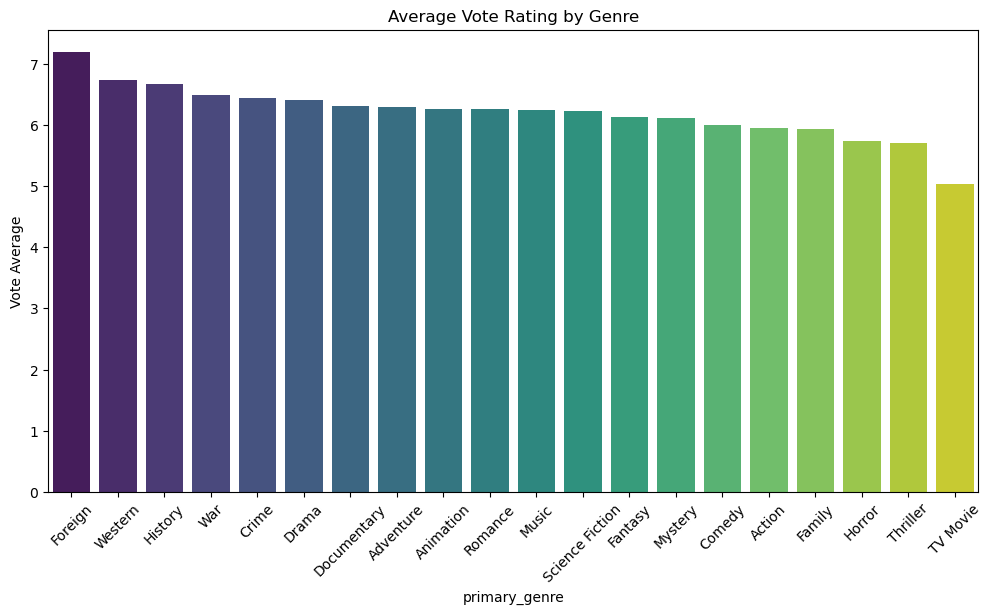

In [14]:
#Vote Distribution by Genre
genre_votes = df_movies.explode('genres').groupby('primary_genre')['vote_average'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_votes.index, y=genre_votes.values, palette='viridis')
plt.title('Average Vote Rating by Genre')
plt.xticks(rotation=45)
plt.ylabel('Vote Average')
plt.show()

# Time-Based Trends

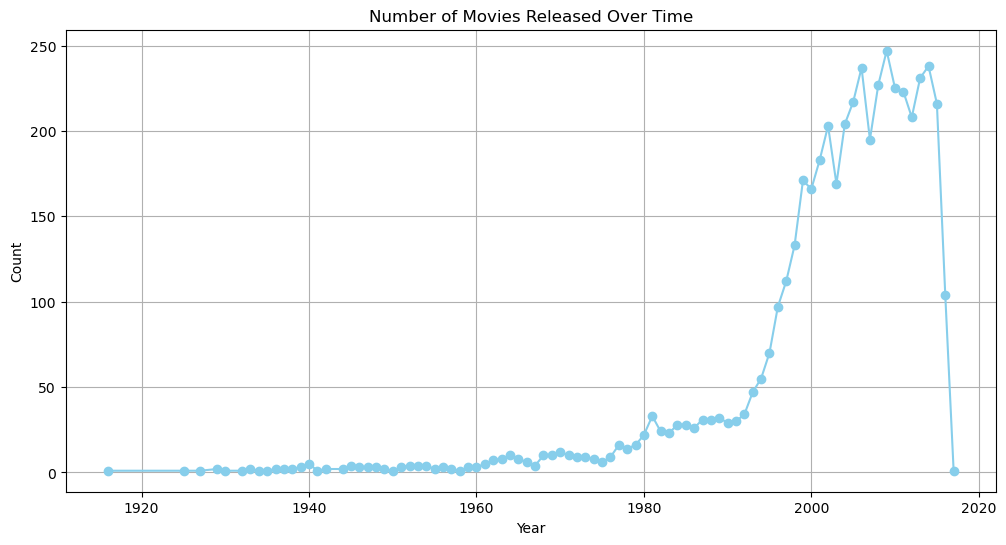

In [15]:
# Movie Count Over Time
df_movies['release_year'] = pd.to_datetime(df_movies['release_date'], errors='coerce').dt.year
movies_per_year = df_movies['release_year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.plot(movies_per_year.index, movies_per_year.values, marker='o', color='skyblue')
plt.title('Number of Movies Released Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid()
plt.show()

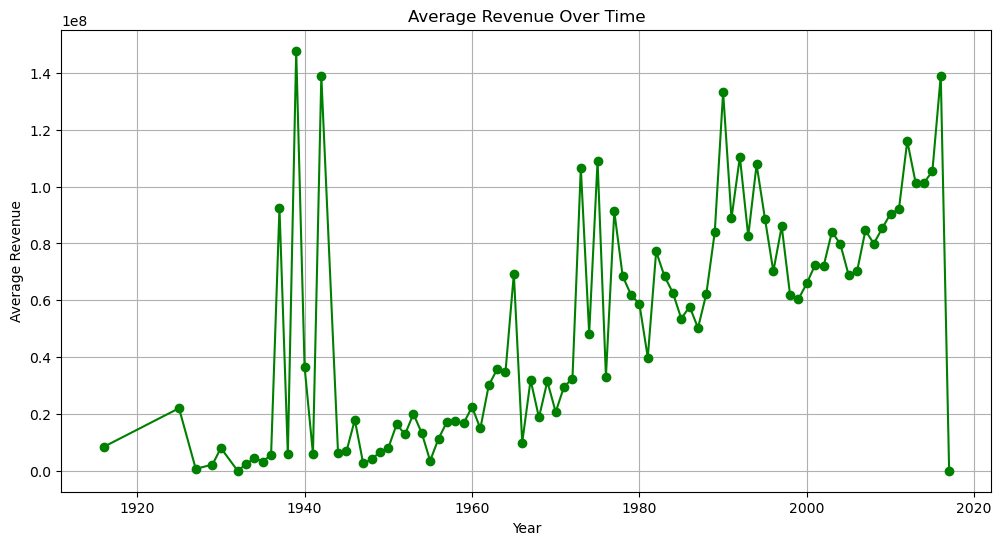

In [16]:
# Revenue Trends Over Time
avg_revenue_per_year = df_movies.groupby('release_year')['revenue'].mean()
plt.figure(figsize=(12, 6))
plt.plot(avg_revenue_per_year.index, avg_revenue_per_year.values, marker='o', color='green')
plt.title('Average Revenue Over Time')
plt.xlabel('Year')
plt.ylabel('Average Revenue')
plt.grid()
plt.show()


# High-Grossing Movies

C:\Users\Gifted\AppData\Local\Temp\ipykernel_11224\3065720046.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_revenue_movies['original_title'], x=top_revenue_movies['revenue'], palette='coolwarm')


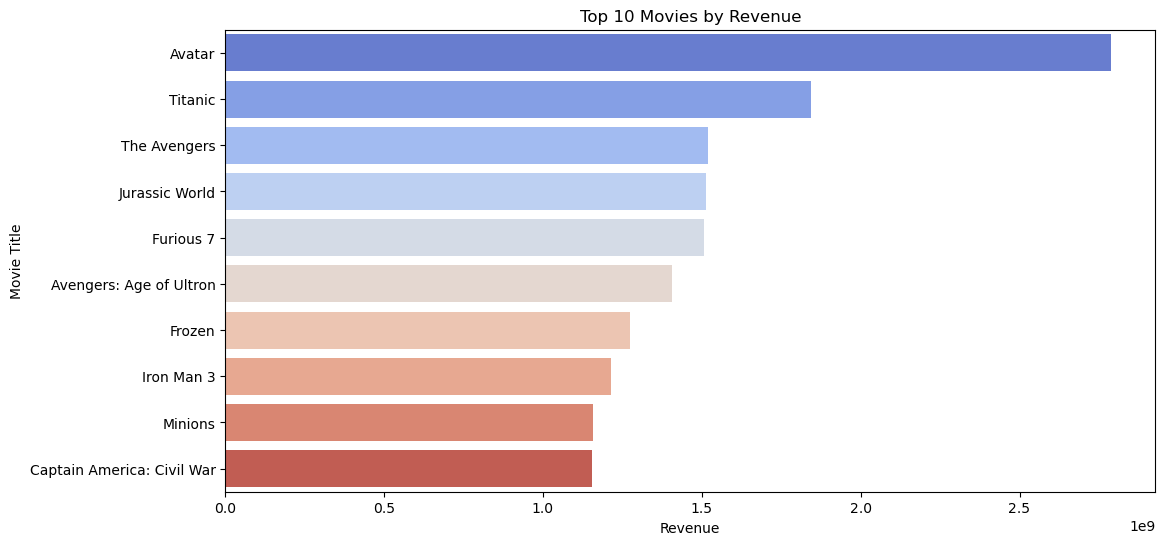

In [17]:
# Top Movies by Revenue
top_revenue_movies = df_movies.nlargest(10, 'revenue')[['original_title', 'revenue']]
plt.figure(figsize=(12, 6))
sns.barplot(y=top_revenue_movies['original_title'], x=top_revenue_movies['revenue'], palette='coolwarm')
plt.title('Top 10 Movies by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Movie Title')
plt.show()


# Popularity Analysis

C:\Users\Gifted\AppData\Local\Temp\ipykernel_11224\563773595.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_popular_movies['original_title'], x=top_popular_movies['popularity'], palette='plasma')


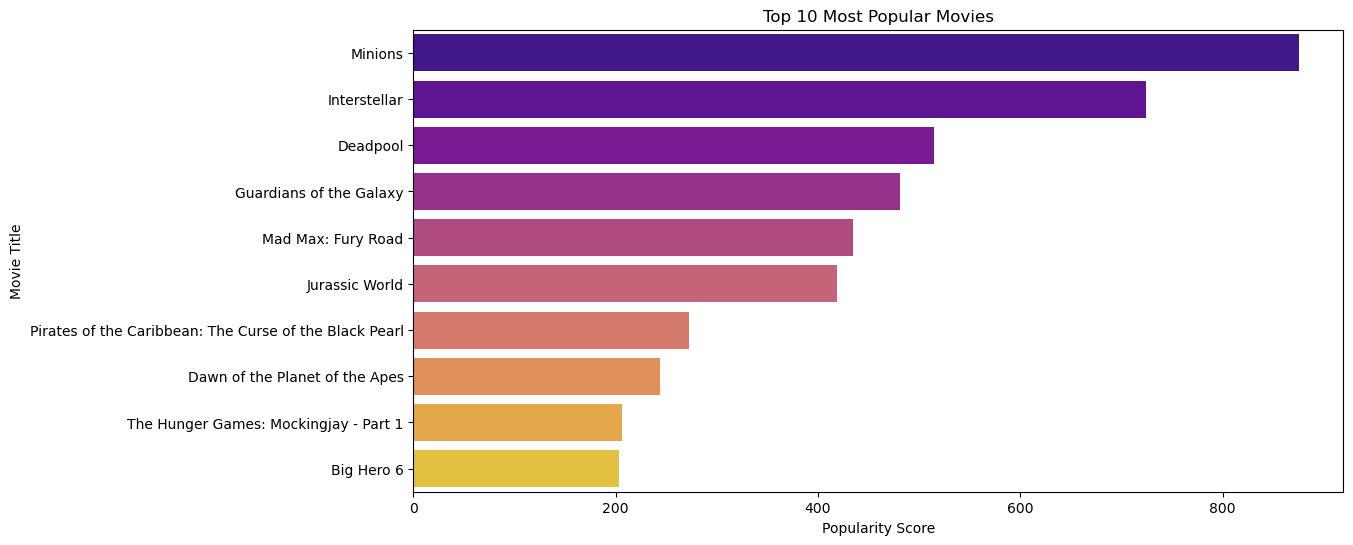

In [18]:
# Highly Popular Movies
top_popular_movies = df_movies.nlargest(10, 'popularity')[['original_title', 'popularity']]
plt.figure(figsize=(12, 6))
sns.barplot(y=top_popular_movies['original_title'], x=top_popular_movies['popularity'], palette='plasma')
plt.title('Top 10 Most Popular Movies')
plt.xlabel('Popularity Score')
plt.ylabel('Movie Title')
plt.show()


# Budget vs. Revenue Analysis

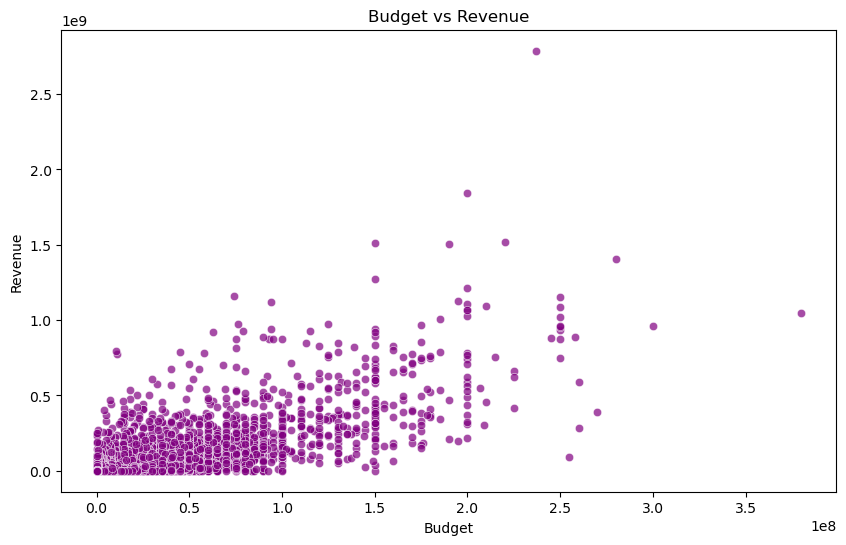

In [19]:
#Budget vs. Revenue Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='revenue', data=df_movies, alpha=0.7, color='purple')
plt.title('Budget vs Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()


# Outliers Detection

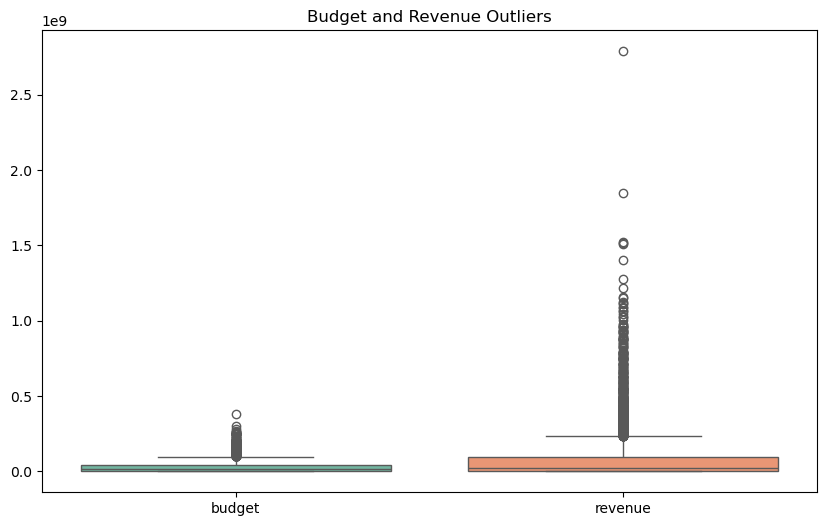

In [20]:
#Revenue and Budget Outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_movies[['budget', 'revenue']], palette='Set2')
plt.title('Budget and Revenue Outliers')
plt.show()

# Vote Count Analysis

C:\Users\Gifted\AppData\Local\Temp\ipykernel_11224\1799002249.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_voted_movies['original_title'], x=top_voted_movies['vote_count'], palette='inferno')


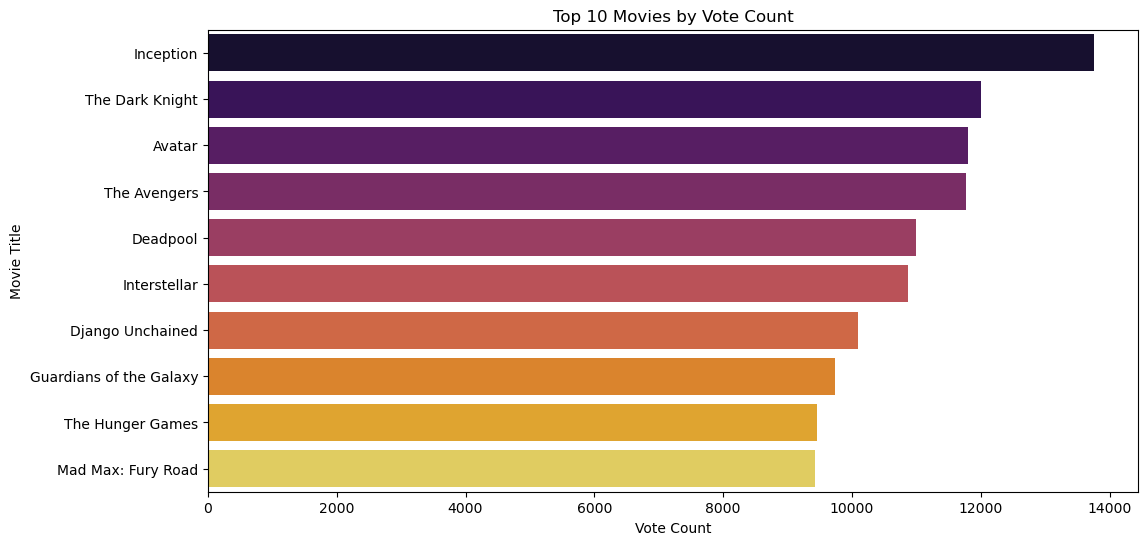

In [21]:
#Top Movies by Vote Count
top_voted_movies = df_movies.nlargest(10, 'vote_count')[['original_title', 'vote_count']]
plt.figure(figsize=(12, 6))
sns.barplot(y=top_voted_movies['original_title'], x=top_voted_movies['vote_count'], palette='inferno')
plt.title('Top 10 Movies by Vote Count')
plt.xlabel('Vote Count')
plt.ylabel('Movie Title')
plt.show()


 # Textual Analysis

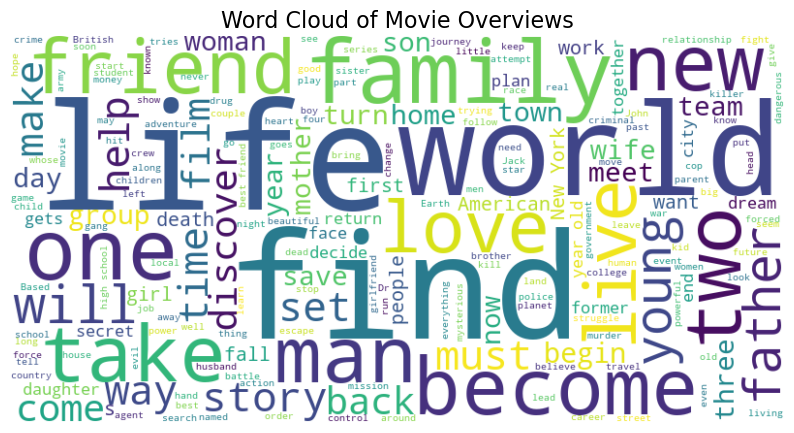

In [22]:
# Word Cloud of Overviews
from wordcloud import WordCloud

text = " ".join(df_movies['overview'].fillna(''))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Overviews', fontsize=16)
plt.show()

# 3. Build Recommendation Model

In [23]:
print("\nBuilding Recommendation Model...")


Building Recommendation Model...


In [24]:
# Preprocess the 'overview' column
df_movies['overview'] = df_movies['overview'].fillna('')

In [25]:
# Preprocess the 'overview' column
df_movies['overview'] = df_movies['overview'].fillna('')

In [26]:
# Apply TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_movies['overview'])

In [27]:
# Compute cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [28]:
# Map movie titles to their indices
indices = pd.Series(df_movies.index, index=df_movies['original_title']).drop_duplicates()

In [29]:
# Define recommendation function
def get_recommendations(title, cosine_sim=cosine_sim):
    """
    Recommends movies similar to the given title based on cosine similarity.
    
    Args:
    - title (str): Movie title.
    - cosine_sim (ndarray): Cosine similarity matrix.
    
    Returns:
    - list: Recommended movie titles.
    """
    try:
        idx = indices[title]
        sim_scores = list(enumerate(cosine_sim[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:11]
        sim_indices = [i[0] for i in sim_scores]
        return df_movies['original_title'].iloc[sim_indices]
    except KeyError:
        return f"Movie '{title}' not found in the dataset."

# 4. Test the Model

In [30]:

print("\nRecommendations for 'The Dark Knight Rises':")
print(get_recommendations('The Dark Knight Rises'))


Recommendations for 'The Dark Knight Rises':
65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: original_title, dtype: object


In [31]:
print("\nRecommendations for 'The Avengers':")
print(get_recommendations('The Avengers'))


Recommendations for 'The Avengers':
7               Avengers: Age of Ultron
3144                            Plastic
1715                            Timecop
4124                 This Thing of Ours
3311              Thank You for Smoking
3033                      The Corruptor
588     Wall Street: Money Never Sleeps
2136         Team America: World Police
1468                       The Fountain
1286                        Snowpiercer
Name: original_title, dtype: object


In [32]:
print("\nRecommendations for 'Inception':")
print(get_recommendations('Inception'))


Recommendations for 'Inception':
2897                                Cypher
134     Mission: Impossible - Rogue Nation
1930                            Stone Cold
914                   Central Intelligence
1683                       Pitch Perfect 2
1248                        At First Sight
1512                 A History of Violence
2389                           Renaissance
1803                        Blood and Wine
1267                                Duplex
Name: original_title, dtype: object


In [33]:
print("\nRecommendations for 'Spiderman':")
print(get_recommendations('spiderman'))


Recommendations for 'Spiderman':
Movie 'spiderman' not found in the dataset.


In [34]:

print("\nRecommendations for 'Spider-Man':")
print(get_recommendations('Spider-Man'))


Recommendations for 'Spider-Man':
5                    Spider-Man 3
38       The Amazing Spider-Man 2
20         The Amazing Spider-Man
30                   Spider-Man 2
1534                Arachnophobia
953     Gremlins 2: The New Batch
1720                     Kick-Ass
2740                  The New Guy
3216                     Election
1572    Forgetting Sarah Marshall
Name: original_title, dtype: object


In [35]:
#The Dark Knight Rises
#Avatar

 #  5. Save the Model 

In [36]:
import joblib

# Save the TF-IDF Vectorizer
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

# Save the TF-IDF Matrix
joblib.dump(tfidf_matrix, 'tfidf_matrix.pkl')

# Save the Cosine Similarity Matrix
joblib.dump(cosine_sim, 'cosine_similarity.pkl')

print("Models saved successfully!")


Models saved successfully!


# 6. Load the Model

In [37]:
# Load saved models
tfidf = joblib.load('tfidf_vectorizer.pkl')
tfidf_matrix = joblib.load('tfidf_matrix.pkl')
cosine_sim = joblib.load('cosine_similarity.pkl')

print("Models loaded successfully!")


Models loaded successfully!


# Save the Models

In [38]:
import joblib

# Assuming the models were created in the script
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')
joblib.dump(tfidf_matrix, 'tfidf_matrix.pkl')
joblib.dump(cosine_sim, 'cosine_similarity.pkl')


['cosine_similarity.pkl']

 # Test with the Saved Model

In [39]:
import joblib
import pandas as pd

# Load the saved models
tfidf = joblib.load('tfidf_vectorizer.pkl')
tfidf_matrix = joblib.load('tfidf_matrix.pkl')
cosine_sim = joblib.load('cosine_similarity.pkl')

# Load the dataset (ensure you have the same dataset used to create the model)
df_movies = pd.read_csv('tmdb_5000_movies.csv.zip')

# Map movie titles to indices
indices = pd.Series(df_movies.index, index=df_movies['original_title']).drop_duplicates()

# Define the recommendation function
def get_recommendations(title, cosine_sim=cosine_sim):
    """
    Recommends movies similar to the given title based on cosine similarity.

    Args:
    - title (str): Movie title.
    - cosine_sim (ndarray): Cosine similarity matrix.

    Returns:
    - list: Recommended movie titles.
    """
    try:
        idx = indices[title]
        sim_scores = list(enumerate(cosine_sim[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:11]
        sim_indices = [i[0] for i in sim_scores]
        return df_movies['original_title'].iloc[sim_indices]
    except KeyError:
        return f"Movie '{title}' not found in the dataset."




In [40]:
# Test the function
print("\nRecommendations for 'The Dark Knight Rises':")
print(get_recommendations('The Dark Knight Rises'))

print("\nRecommendations for 'The Avengers':")
print(get_recommendations('The Avengers'))


Recommendations for 'The Dark Knight Rises':
65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: original_title, dtype: object

Recommendations for 'The Avengers':
7               Avengers: Age of Ultron
3144                            Plastic
1715                            Timecop
4124                 This Thing of Ours
3311              Thank You for Smoking
3033                      The Corruptor
588     Wall Street: Money Never Sleeps
2136         Team America: World Police
1468                       The Fountain
1286                        Snowpiercer
N